In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygal
import matplotlib.pyplot as plt
% matplotlib inline
#import libraries

In [49]:
data = pd.read_csv('train.csv')
#import data

In [3]:
# Running a loop to store the column names
train_names = []
for i in range(0,59):
    if not ((data.columns[i] =="id" ) or (data.columns[i]=="target")):
        train_names.append(data.columns[i])

In [4]:
data.head()
#look at a sample of the data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
data['target'].value_counts()
#look at count of no claims (0) compared to claims (1)

0    573518
1     21694
Name: target, dtype: int64

In [6]:
data_fixed = data.replace(-1, np.NaN)
#replace the -1 (which are not filled out) with numpys NaN 

In [7]:
claim = data_fixed['target'].map(lambda x: x == 1)
data[claim].head()
#look at a sample of ids that have filled a claim

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0
19,64,1,0,1,2,1,0,1,0,0,...,10,3,1,11,0,1,1,0,1,0
28,84,1,0,2,0,1,4,1,0,0,...,3,2,0,8,0,1,1,0,0,0
39,107,1,2,1,3,1,0,0,0,1,...,6,0,8,14,0,1,0,1,0,0
41,110,1,5,2,1,0,0,0,0,1,...,5,2,0,7,1,1,0,0,0,0


In [8]:
no_claim = data_fixed['target'].map(lambda x: x == 0)
data[no_claim].head()
#look at a sample of ids that have not filled a claim

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [9]:
data_fixed[claim].describe()
#look at means, std, etc of those who filled a claim

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,2.169400e+04,21694.0,21694.000000,21654.000000,21694.000000,21661.000000,21210.000000,21694.000000,21694.000000,21694.000000,...,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000
mean,7.433875e+05,1.0,2.089794,1.378821,4.539366,0.442731,0.644413,0.308288,0.333917,0.188946,...,5.445838,1.434913,2.868397,7.558265,0.121600,0.629391,0.553748,0.288467,0.344750,0.151332
std,4.302479e+05,0.0,2.042275,0.678817,2.792390,0.496721,1.645918,0.461797,0.471621,0.391475,...,2.351865,1.200263,1.693677,2.751613,0.326831,0.482979,0.497114,0.453060,0.475298,0.358381
min,2.800000e+01,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.703325e+05,1.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.432405e+05,1.0,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115372e+06,1.0,4.000000,2.000000,7.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.487866e+06,1.0,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,16.000000,8.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_fixed[no_claim].describe()
#look at means, std, etc of those who did not filled a claim

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.735180e+05,573518.0,573518.000000,573342.000000,573518.000000,573468.000000,568193.000000,573518.000000,573518.000000,573518.000000,...,573518.000000,573518.000000,573518.000000,573518.000000,573518.000000,573518.000000,573518.000000,573518.000000,573518.000000,573518.000000
mean,7.438193e+05,0.0,1.893213,1.359081,4.418928,0.416020,0.410625,0.396974,0.254125,0.162975,...,5.441214,1.442183,2.872435,7.538299,0.122458,0.627782,0.554199,0.287133,0.349185,0.153394
std,4.293349e+05,0.0,1.981189,0.662586,2.696246,0.492897,1.336977,0.489271,0.435368,0.369343,...,2.332152,1.203065,1.694934,2.746464,0.327815,0.483397,0.497054,0.452425,0.476713,0.360367
min,7.000000e+00,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.720565e+05,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435565e+05,0.0,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115554e+06,0.0,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,0.0,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# collecting all the data from the bins section
bin_data_1 = data_fixed["ps_calc_15_bin"].map(lambda x: x==1)
bin_data_2 = data_fixed["ps_calc_16_bin"].map(lambda x: x==1)
bin_data_3 = data_fixed["ps_calc_17_bin"].map(lambda x: x==1)
bin_data_4 = data_fixed["ps_calc_18_bin"].map(lambda x: x==1)
bin_data_5 = data_fixed["ps_calc_19_bin"].map(lambda x: x==1)
bin_data_6 = data_fixed["ps_calc_20_bin"].map(lambda x: x==1)

In [12]:
# Retriving the claimed index to process data 
claims = []
for i in range(0,len(claim)):
    if (claim[i]):
        claims.append(i)

In [13]:
# Getting the data of all claimed
bin_15=[]
bin_16=[]
bin_17=[]
bin_18=[]
bin_19=[]
bin_20=[]
for i in claims:
    bin_15.append(bin_data_1[i])
    bin_16.append(bin_data_2[i])
    bin_17.append(bin_data_3[i])
    bin_18.append(bin_data_4[i])
    bin_19.append(bin_data_5[i])
    bin_20.append(bin_data_6[i])
    

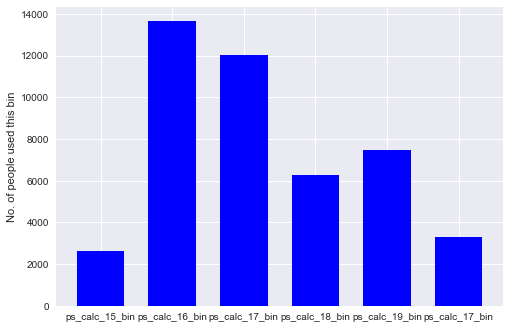

In [15]:
# Analyzing the data of the claimed drivers and the one who have the bins selected.
y = [sum(bin_15), sum(bin_16), sum(bin_17), sum(bin_18), sum(bin_19),sum(bin_20)]
N = len(y)
x = range(N)
width = 1/1.5
objects = ('ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin','ps_calc_17_bin')
y_pos = np.arange(len(objects))
plt.bar(x, y,width, color="blue")
plt.xticks(y_pos, objects)
plt.ylabel('No. of people used this bin')
plt.show()

In [16]:
# Retriving the not claimed index to process data 
no_claims = []
for i in range(0,len(no_claim)):
    if (no_claim[i]):
        no_claims.append(i)

In [17]:
# Getting the data of all non-claimed
bin_15_nc=[]
bin_16_nc=[]
bin_17_nc=[]
bin_18_nc=[]
sum(bin_15_nc)-sum(bin_15)bin_19_nc=[]
bin_20_nc=[]
for i in no_claims:
    bin_15_nc.append(bin_data_1[i])
    bin_16_nc.append(bin_data_2[i])
    bin_17_nc.append(bin_data_3[i])
    bin_18_nc.append(bin_data_4[i])
    bin_19_nc.append(bin_data_5[i])
    bin_20_nc.append(bin_data_6[i])

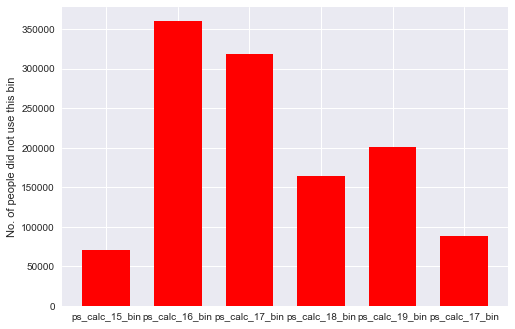

In [19]:
# Analyzing the data of the claimed drivers and the one who have not selected the bins.
y = [sum(bin_15_nc), sum(bin_16_nc), sum(bin_17_nc), sum(bin_18_nc), sum(bin_19_nc),sum(bin_20_nc)]
N = len(y)
x = range(N)
width = 1/1.5
objects = ('ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin','ps_calc_17_bin')
plt.bar(x, y,width, color="red")
plt.xticks(y_pos, objects)
plt.ylabel('No. of people did not use this bin')
plt.show()

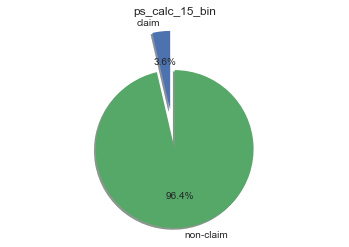

In [62]:
# Analyzing Specie Versicolor data sets
labels = 'claim', 'non-claim'
sizes = [sum(bin_15),sum(bin_15_nc)]
explode = (0.5, 0)  # only "explode" the 3rd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('ps_calc_15_bin')
plt.show()

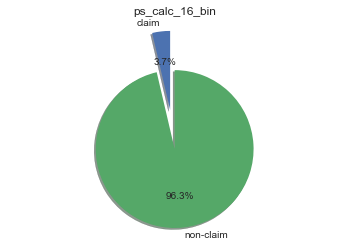

In [63]:
# Analyzing Specie Versicolor data sets
labels = 'claim', 'non-claim'
sizes = [sum(bin_16),sum(bin_16_nc)]
explode = (0.5, 0)  # only "explode" the 3rd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('ps_calc_16_bin')
plt.show()

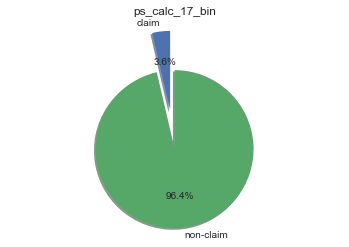

In [64]:
# Analyzing Specie Versicolor data sets
labels = 'claim', 'non-claim'
sizes = [sum(bin_17),sum(bin_17_nc)]
explode = (0.5, 0)  # only "explode" the 3rd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('ps_calc_17_bin')
plt.show()

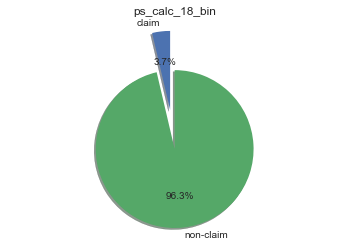

In [65]:
# Analyzing Specie Versicolor data sets
labels = 'claim', 'non-claim'
sizes = [sum(bin_18),sum(bin_18_nc)]
explode = (0.5, 0)  # only "explode" the 3rd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('ps_calc_18_bin')
plt.show()

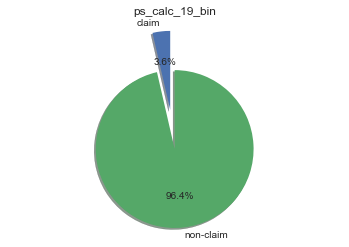

In [66]:
# Analyzing Specie Versicolor data sets
labels = 'claim', 'non-claim'
sizes = [sum(bin_19),sum(bin_19_nc)]
explode = (0.5, 0)  # only "explode" the 3rd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('ps_calc_19_bin')
plt.show()

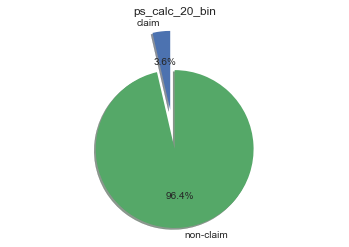

In [67]:
# Analyzing Specie Versicolor data sets
labels = 'claim', 'non-claim'
sizes = [sum(bin_20),sum(bin_20_nc)]
explode = (0.5, 0)  # only "explode" the 3rd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('ps_calc_20_bin')
plt.show()

In [ ]:
data_float = data.select_dtypes(include=['float64'])
#data is broken into ints and floats these sort out the floats
data_int = data.select_dtypes(include=['int64'])
#data is broken into ints and floats these sort out the ints

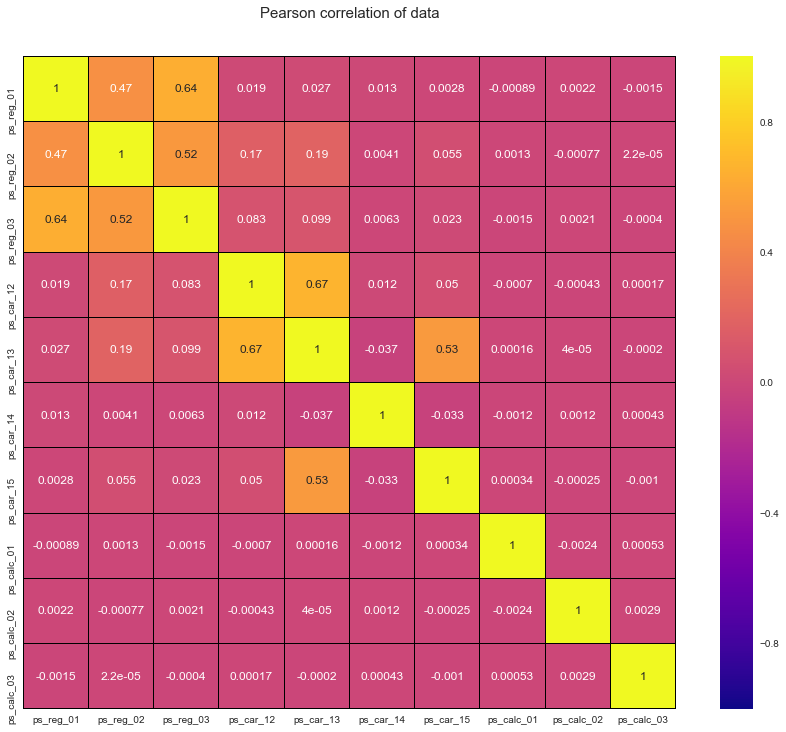

In [65]:
colormap = plt.cm.plasma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of data', y = 1.05, size = 15)
sns.heatmap(data_float.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=True)
sns.plt.show()
#heatmap showing the Pearson's correlation of only the float data columns
#for example ps_reg_03 and ps_reg_01 have high correlation

In [66]:
data_float.describe()
#shows the mean, std, etc. of the float columns 

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [15]:
dfc = data_float[claim]
dfc = dfc.replace(-1, np.NaN)
dfc.describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,21694.000000,21694.000000,18634.000000,21694.000000,21694.000000,19971.000000,21694.000000,21694.000000,21694.000000,21694.000000
mean,0.644842,0.511519,0.952534,0.391578,0.875505,0.377440,3.169940,0.452388,0.451595,0.452664
std,0.277385,0.442019,0.362817,0.063481,0.261968,0.050297,0.642692,0.286539,0.285094,0.286131
min,0.000000,0.000000,0.253722,0.141421,0.322119,0.118322,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.673146,0.316228,0.702843,0.345977,3.000000,0.200000,0.200000,0.200000
50%,0.700000,0.400000,0.865303,0.400000,0.816846,0.374833,3.316625,0.500000,0.500000,0.500000
75%,0.900000,0.700000,1.170937,0.424264,0.979279,0.401746,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,3.197753,1.264911,3.720626,0.631664,3.741657,0.900000,0.900000,0.900000


In [16]:
dfnc = data_float[no_claim]
dfnc = dfnc.replace(-1, np.NaN)
dfnc.describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,573518.000000,573518.000000,468806.000000,573517.000000,573518.000000,532621.000000,573518.000000,573518.000000,573518.000000,573518.000000
mean,0.609711,0.436448,0.891723,0.379507,0.810910,0.374588,3.061964,0.449657,0.449513,0.449742
std,0.287946,0.402512,0.344498,0.058049,0.222710,0.045422,0.734222,0.287223,0.286961,0.287191
min,0.000000,0.000000,0.061237,0.100000,0.250619,0.109545,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.631961,0.316228,0.669556,0.350428,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.799218,0.374166,0.764664,0.373497,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.080220,0.400000,0.903746,0.397492,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.515803,0.636396,3.741657,0.900000,0.900000,0.900000


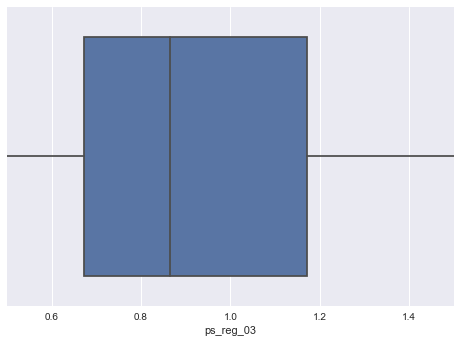

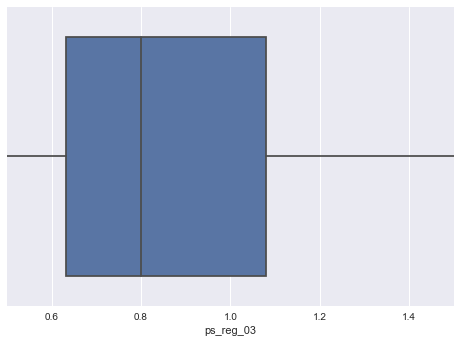

In [17]:
sns.boxplot(x = "ps_reg_03", data = dfc, whis = np.inf)
plt.xlim(0.500, 1.500)
plt.show()
sns.boxplot(x = "ps_reg_03", data = dfnc, whis = np.inf)
plt.xlim(0.500, 1.500)
plt.show()

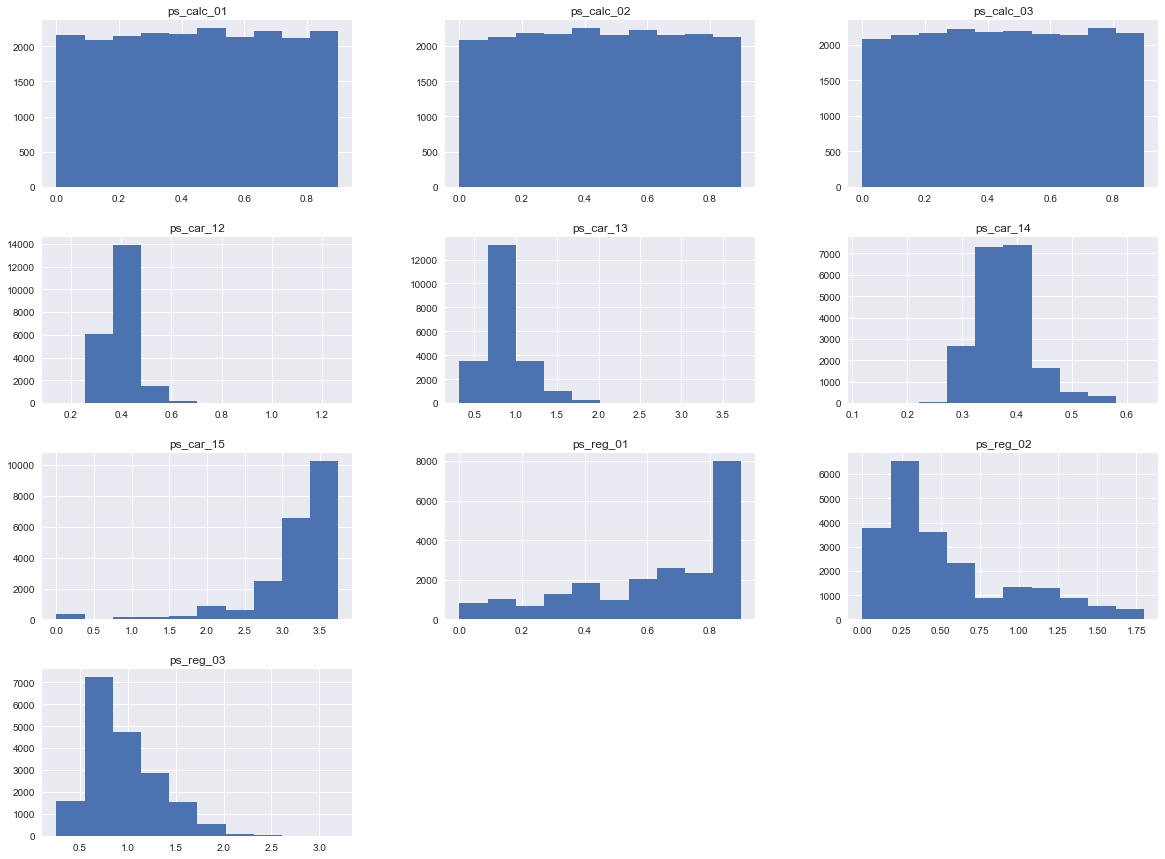

In [18]:
df = data_float.replace(-1, np.NaN)
df[claim].hist()
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

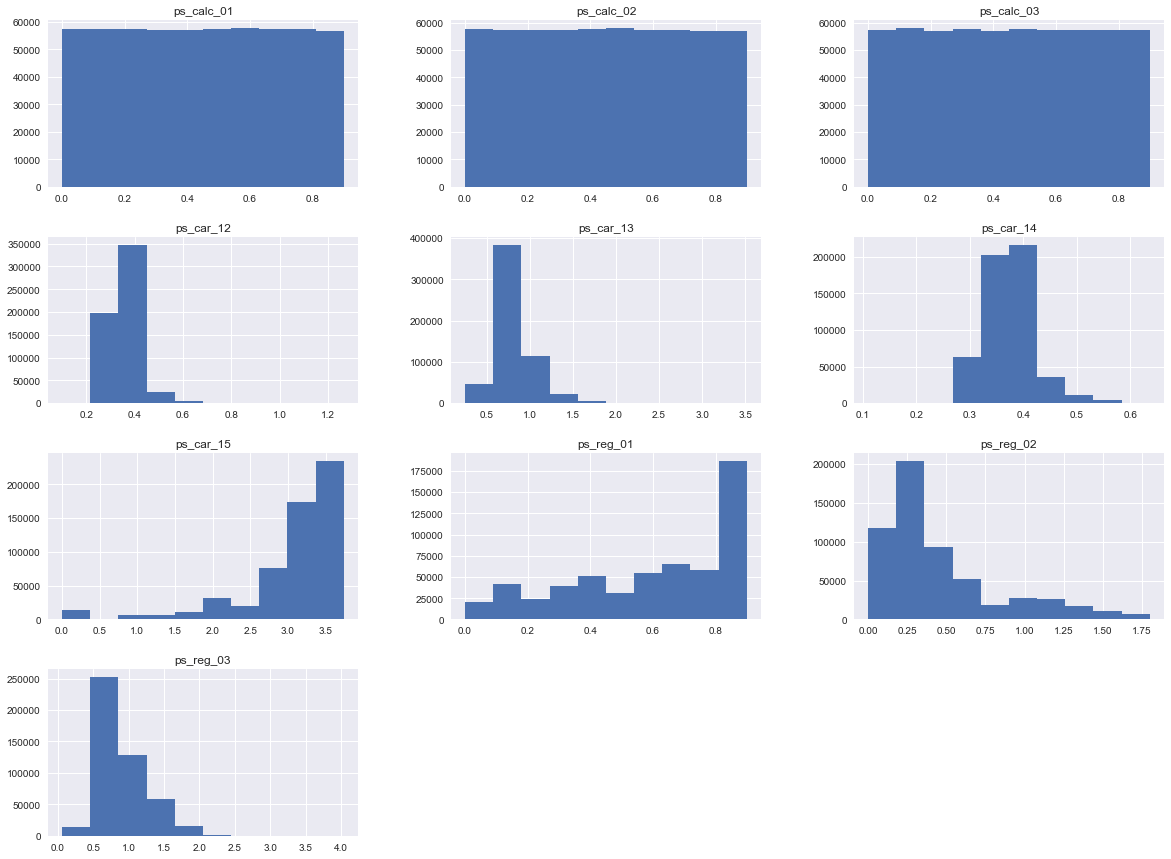

In [19]:
df[no_claim].hist()
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

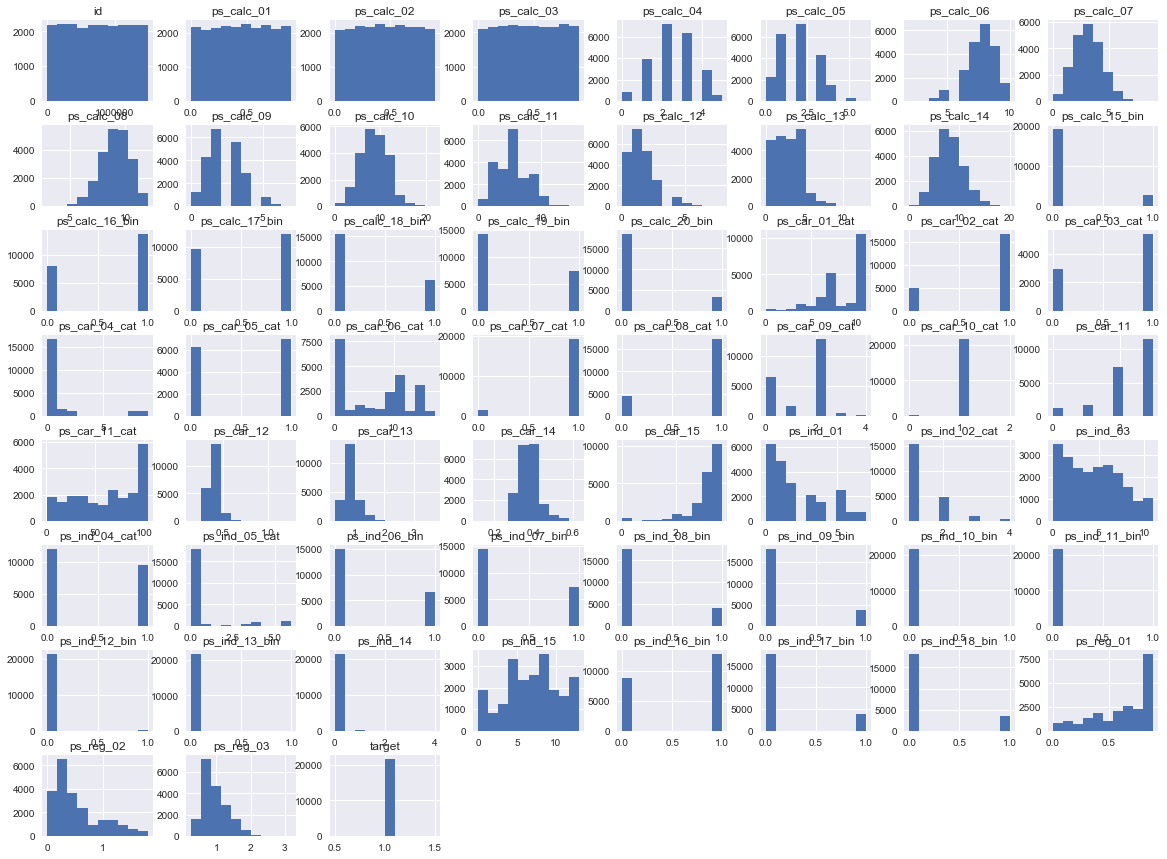

In [ ]:
data_fixed[claim].hist()
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

In [ ]:
data_fixed[no_claim].hist()
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

In [ ]:
import sklearn

In [ ]:
data.shape

In [ ]:
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

In [ ]:
train_X = train[train_names]
train_y = train.target
test_X = test[train_names]
test_y = test.target

In [ ]:
model = sklearn.svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the SVM is:', matrics.accuracy_score(prediction,test_y))